# This notebook introduces the sweep object

Sweep objects allowes the user the work with the QCoDeS data set in a convenient way. This includes: 

1. Registering parameters, including dependencies (e.g. which parameters are set points and which are measurement)
2. Setting set points and getting measurement values and adding them to the data set 
3. Extracting measurement data after competion in a convenient way 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qcodes import new_experiment
from qcodes.dataset.plotting import plot_by_id
from qcodes.instrument.parameter import ManualParameter
from qcodes.sweep import sweep, getter, run

Like always, we need to start an experiment before doing anything else 

In [2]:
experiment = new_experiment("sweep_introduction", sample_name="intro")

Lets setup mock instruments 

In [3]:
x = ManualParameter("x")
y = ManualParameter("y")

m = ManualParameter("m")
m.get = lambda:np.sin(x())

n = ManualParameter("n")
n.get = lambda:np.sin(x()**2 + y())

Next, we perform a sweep where we measure both m and n. Parameter m is only dependent on set points x while n is dependent on both x and y.  

In [4]:
sweep_object = sweep(x, np.linspace(-4, 4, 100))(
    m, 
    sweep(y, np.linspace(-3, 5, 100))(
        n
    )
)

Next we define setup and cleanup functions. 

In [5]:
def setup1(x): 
    print(f"setting up 1 with {x}")

def setup2(x): 
    print(f"setting up 2 with {x}")

def cleanup(): 
    print("cleaning up")

The run function takes care of making paramspecs and registering them with the data set 

In [6]:
data = run(
    [(setup1, (2.,)), (setup2, (3,))],
    sweep_object,
    [(cleanup, ())]
)

setting up 1 with 2.0
setting up 2 with 3
Starting experimental run with id: 45
cleaning up


We plot with 

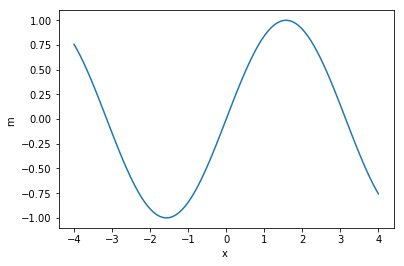

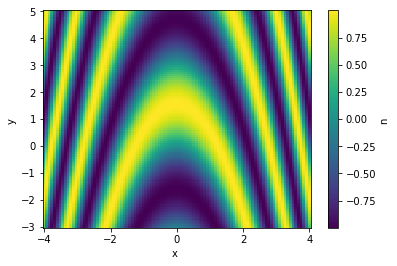

In [7]:
data.plot()

In [8]:
data.run_id

45

Convenient access to data 

In [9]:
xm = data["m,x"]

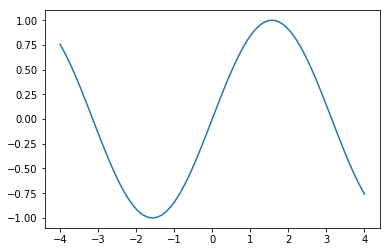

In [10]:
plt.plot(xm["x"], xm["m"])

In [11]:
xn = data["n,x"]  # data["x,n"] works just as well, or indeed just data["n"]

In [12]:
xn.keys()

dict_keys(['x', 'y', 'n'])

In [13]:
len(xn["x"])

10000

In [14]:
len(xm["x"])

100

Lastly, we often perform measurements with measurement functions, rather then accessing parameter values directly 

In [15]:
@getter([("a", "mV"), ("b", "Ohm")])   
def measure(): 
    i = m()
    j = n()
    
    # Some calculation
    a = i + j
    b = i - j
    
    return a, b

In [16]:
sweep_object2 = sweep(x, np.linspace(-4, 4, 100))(
    m, 
    sweep(y, np.linspace(-3, 5, 100))(
        measure
    )
)

In [17]:
data = run(
    [(setup1, (2.,)), (setup2, (3,))],
    sweep_object2,
    [(cleanup, ())]
)

setting up 1 with 2.0
setting up 2 with 3
Starting experimental run with id: 46
cleaning up


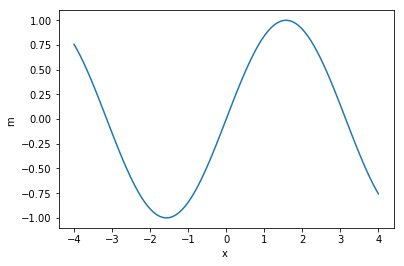

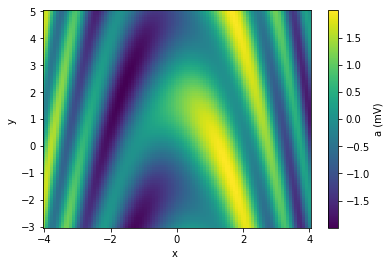

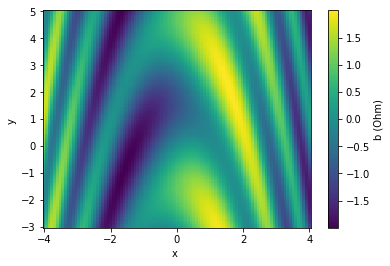

In [18]:
data.plot()

We see that both "a" and "b" are dependent on "x" and "y" 

In [19]:
data["a"].keys()

dict_keys(['x', 'y', 'a'])

In [20]:
data["b"].keys()

dict_keys(['x', 'y', 'b'])